### Modeles Stochastiques en Finance MAP 552
#### Computer Problem Set 3.1
### Monte Carlo approximation of the Greeks
##### GNABEYEU MBIADA Emmanuel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In the context of the Black-Scholes model with constant interest rate r, con- stant volatility parameter σ > 0, and Brownian motion B under the risk-neutral measure:
$dS_t := S_t(rdt + \sigma dB_t)$, with then the solution:
$S_t = S_0 exp((r-\frac{\sigma^2}{2})t + \sigma B_t)$

we are interested in the numerical approximation of the no arbitrage price of a binary option defined by the payoff $1_{\_{ST ≤K}}$ at the maturity date T, for some K > 0, together with the corresponding optimal hedging strategy:
$C_0 :=e^{−rT}\mathbb{E}[1_{S_T \leq K}]$ and $∆0 := e^{−rT} \frac{\partial}{\partial S_0}\mathbb{E}[1_{S_T \leq K}]$ . That is the binary option $1_{S_T \leq K}$ on the asset S, with strike K and maturity T.

### 1. We first focus on the Monte Carlo approximation of C0.

In [2]:
r = 0.02
sigma0 = 0.4
S0 = 100
T = 0.9
K_range = np.array(range(80, 121))

#### (a) Build a program which returns $C_0$ and $\Delta_0$ for given values of $r, \sigma, S_0 , T , K.$

In [3]:
def d_minus(x,v):
    """
    Compute :d_(x,v)`
    """
    return np.log(x)/np.sqrt(v) - 0.5*np.sqrt(v)

In [4]:
def optimal_hedging_strategy(r, sigma, S0, T, K):
    """
    Args:
        S0: spot price
        K: option strike
    
    Returns:
        Greeks C_0, Delta_0
    """
    x0 = S0/(K*np.exp(-r*T))
    v = (sigma**2)*T
    d_ = d_minus(x0, v)
    C0 = np.exp(-r*T)*norm.cdf(-d_)
    delt0 = -np.exp(-r*T)/(S0*np.sqrt(v))* norm.pdf(-d_)
    return C0, delt0

In [5]:
optimal_hedging_strategy(r, sigma0, S0, T, K_range[0])

(0.3220459673863255, -0.009349088628238819)

>- Let's plot the results

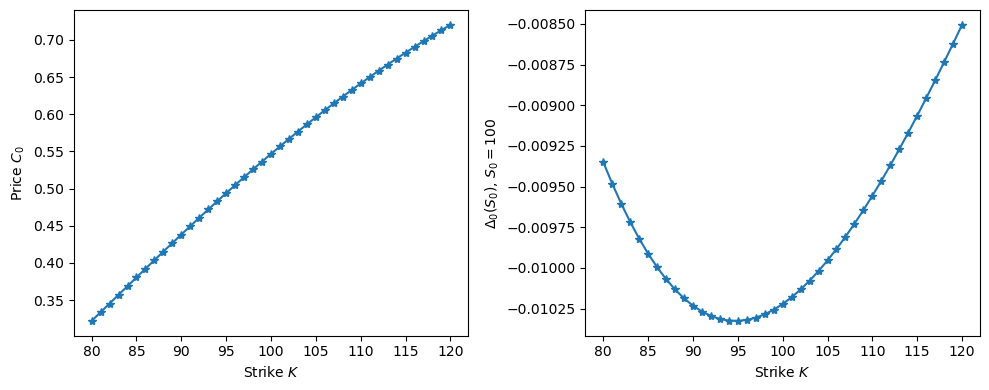

In [6]:
C0, delt0 = optimal_hedging_strategy(r, sigma0, S0, T, K_range)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4), dpi=100)
ax0.plot(K_range, C0, marker='*')
ax0.set_ylabel("Price $C_0$")
ax0.set_xlabel("Strike $K$")
ax1.plot(K_range, delt0, marker='*')
ax1.set_ylabel("$\Delta_0(S_0)$, $S_0=100$")
ax1.set_xlabel("Strike $K$")
fig.tight_layout()

#### (b) Build a program which returns a Monte Carlo approximation $C_0^M$ of $C_0$based on M copies of $B_T$.

$B_T \sim \mathcal{N}(0,\,T) $ and $S_T = S_0 e^{((r-\frac{\sigma^2}{2})T + \sigma B_T)}$

In [83]:
def Monte_Carlo_approximation(r, sigma, S0, T, K, M):
    """
    Monte Carlo simulation of the option price

    Args:
        r: interest rate
        sigma: volatility
        M: number of Monte Carlo samples
    """

    BT = np.sqrt(T)*np.random.randn(M)
    ST = S0*np.exp((r - sigma**2/2)*T + sigma*BT)
    payoff = (ST <= K)
    discount_factor = np.exp(-r*T)
    C0=discount_factor*np.mean(payoff.T, axis=0)
    return C0

In [84]:
C0=Monte_Carlo_approximation(r, sigma0, S0, T, K_range.reshape(-1,1), M=1000)
print(K_range.shape[0], "simulation of $C_0$")
C0

41 simulation of $C_0$


array([0.34473852, 0.35357797, 0.36339958, 0.378132  , 0.39188225,
       0.41152547, 0.42625789, 0.43804382, 0.45081191, 0.46652649,
       0.4763481 , 0.48420539, 0.49304484, 0.50188429, 0.50875941,
       0.5166167 , 0.53036696, 0.54608153, 0.55688531, 0.56376043,
       0.5696534 , 0.57751069, 0.5873323 , 0.59322526, 0.59911823,
       0.60893984, 0.61777929, 0.62956522, 0.63938683, 0.64822628,
       0.65411925, 0.66394086, 0.66983382, 0.67769111, 0.67965543,
       0.69144137, 0.69635217, 0.70420946, 0.70912027, 0.71599539,
       0.72287052])

#### (c) Discuss the numerical results using the parameters values r = 0.02, σ0 = 0.4, S0 = 100, T = 0.9, K = 80 + i, i = 0, . . . , 40, for various samples sizes.

In [85]:
M_range = [100,500,800,1000,1200,1500] # set of sample size of the Monte Carlo estimator
#(number of Monte Carlo samples)

monte_carlo_c0_approx = np.stack([
    Monte_Carlo_approximation(r, sigma0, S0, T, K_range.reshape(-1,1), M) for M in M_range
])

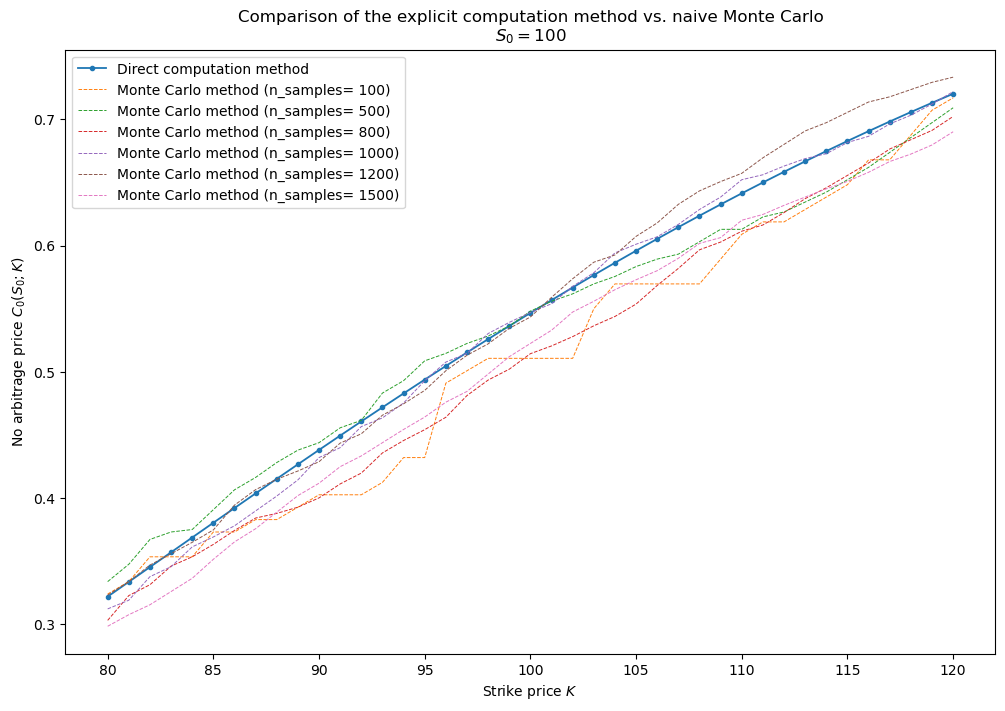

In [91]:
fig, ax0 = plt.subplots(1,1, figsize=(12,8), dpi=100)

math_formula_C0, delt0 = optimal_hedging_strategy(r, sigma0, S0, T, K_range)

ax0.plot(K_range, math_formula_C0, zorder=1,
        linewidth=1.3, marker='.', label="Direct computation method")

for i, mc_c0 in enumerate(monte_carlo_c0_approx[:6]):
    ax0.plot(K_range, mc_c0,
            linestyle='--',
            linewidth=.7, label="Monte Carlo method (n_samples= %d)" % M_range[i])
ax0.set_xlabel("Strike price $K$")
ax0.set_ylabel("No arbitrage price $C_0(S_0;K)$")
ax0.set_title("Comparison of the explicit computation method vs. naive Monte Carlo\n$S_0=100$")
ax0.legend()

>- **Comments:** The price of the binary option increases with the strike: we are more likely to get the unit payoff when the strike is higher.
But the Monte Carlo approximation method has a relatively big variance.

### 2. We denote $C_0^M(S_0)$ to emphasize the dependence of this function on $S_0$.

#### (a) Build a program which returns the centered finite-differences approximation of $∆_0$ and the corresponding 5% confidence interval:
> $∆_0^{M,ε} :=\frac{C_0^M(S_0 +ε)−C_0^M(S_0 −ε)}{2ε}$

> This is the Finite-difference approximation of $∆_0$

In [11]:
def Monte_Carlo_delta(r, sigma, S0, T, K, eps, M):
    """
    Monte Carlo simulation of the Delta Greek
    
    Args:
        eps: finite-difference step
    """
    C01 = Monte_Carlo_approximation(r, sigma, S0+eps, T, K, M)
    C02 = Monte_Carlo_approximation(r, sigma, S0-eps, T, K, M)
    return (C01-C02)/(2*eps)

#### (b) Using the parameters values of Question 1c, discuss numerically the choice of the parameters ε and M.

In [17]:
eps_range = [1e-1, 1e-2, 1e-3, 1e-5]
print('Finite difference step: %s' % eps_range)
print('Number of Monte Carlo samples: %s' % M_range)

MC_delta0_approx = np.stack([
    [Monte_Carlo_delta(r, sigma0, S0, T, K_range.reshape(-1,1), eps, M) for M in M_range ] for eps in eps_range
])

Finite difference step: [0.1, 0.01, 0.001, 1e-05]
Number of Monte Carlo samples: [100, 500, 800, 1000, 1200, 1500]


In [19]:
MC_delta0_approx.shape

(4, 6, 41)

In [25]:
eps_range.index(0.1) 

0

In [79]:
def plot_delt0_comparison(eps):
    fig, ax0 = plt.subplots(1,1, figsize=(12,8), dpi=100)

    math_formula_C0, math_formula_delta0 = optimal_hedging_strategy(r, sigma0, S0, T, K_range)
    
    ax0.plot(K_range, math_formula_delta0, zorder=1,
            linewidth=1.3, marker='.', label="Direct computation method")
    index_eps=eps_range.index(eps) 
    for i, mc_delta in enumerate(MC_delta0_approx[index_eps,:,:]):
        ax0.plot(K_range, mc_delta,
                linestyle='--',
                linewidth=.7, label="Monte Carlo finite-difference (sim. n_sample= %d)" % M_range[i])
    ax0.set_xlabel("Strike price $K$")
    ax0.set_ylabel(" $\Delta_0(S_0; K)$")
    ax0.set_title("Explicit computation vs. Monte Carlo finite-difference\n" +
                  "$\epsilon={:}$".format(eps))
    ax0.legend()

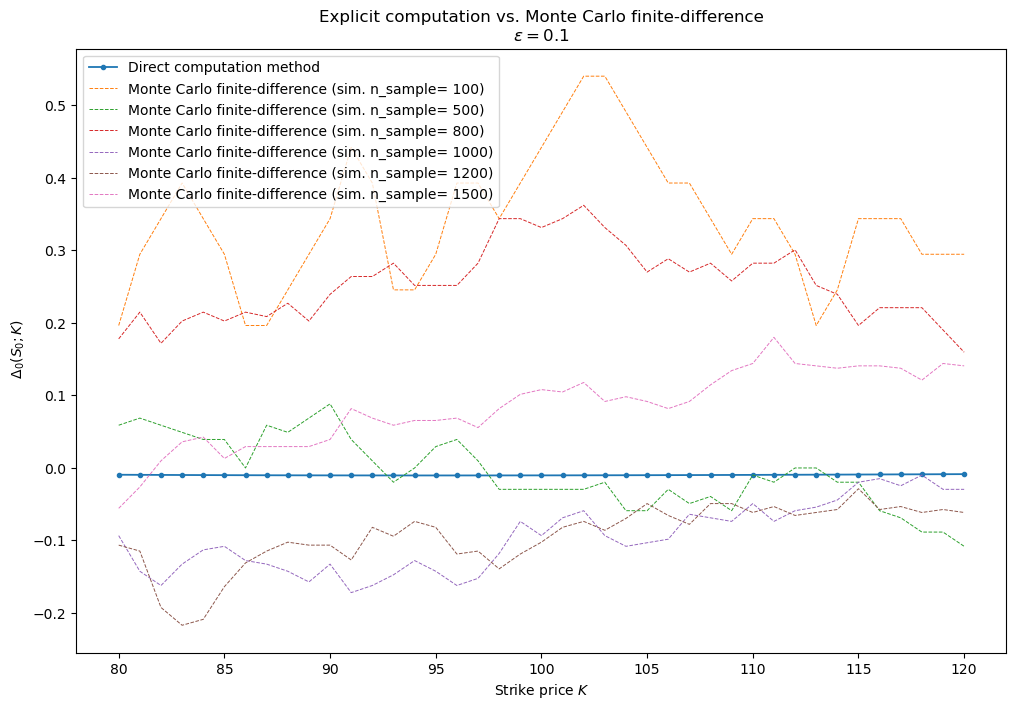

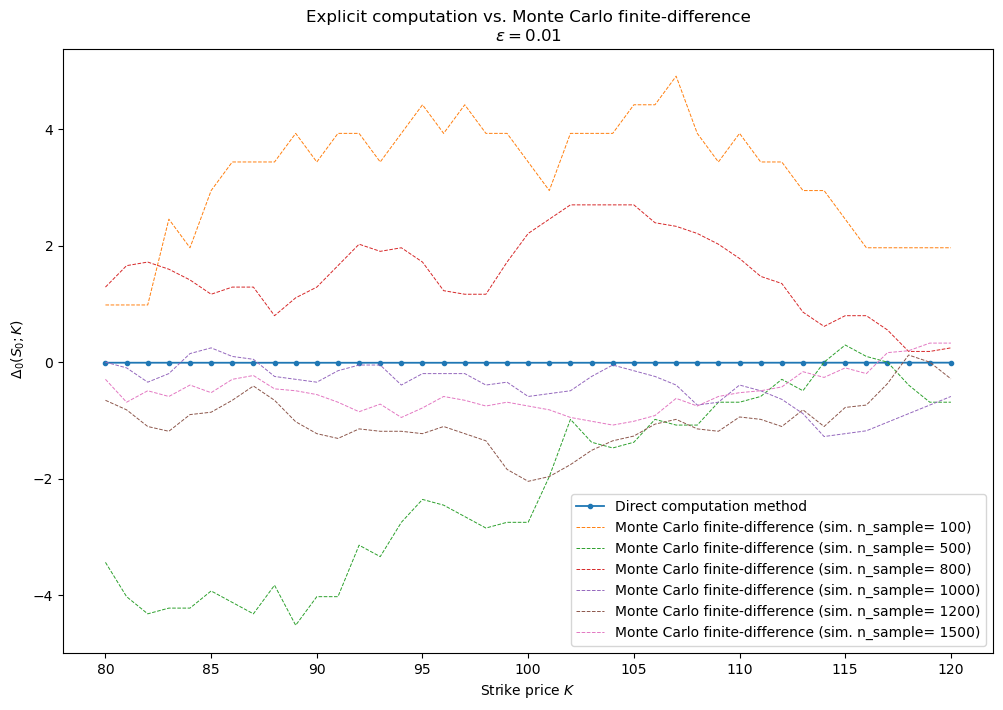

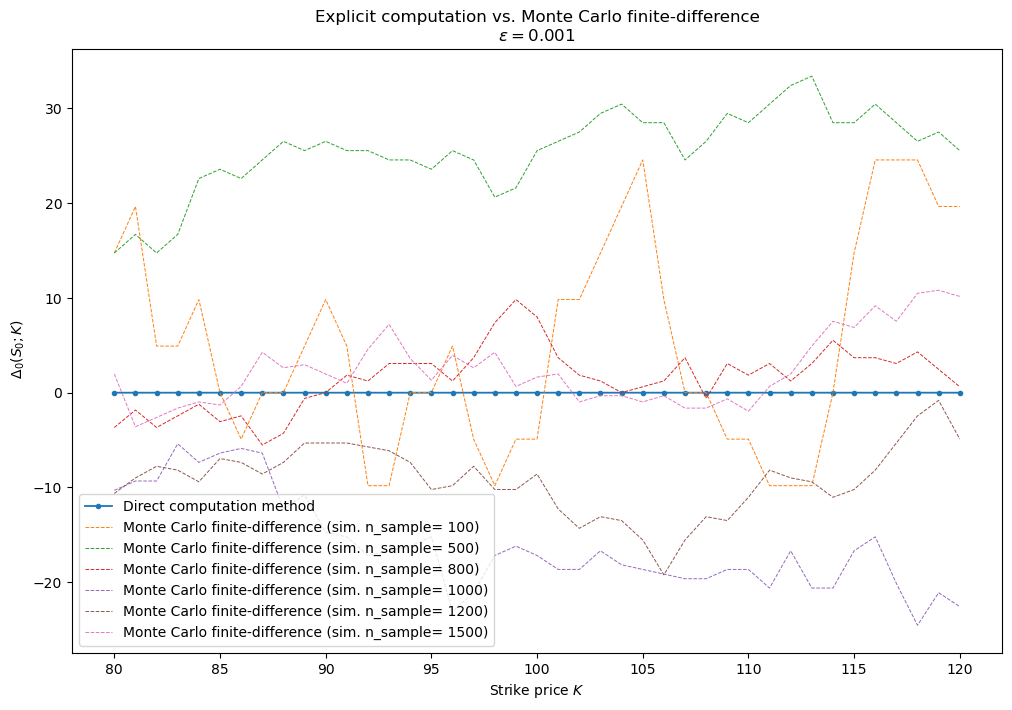

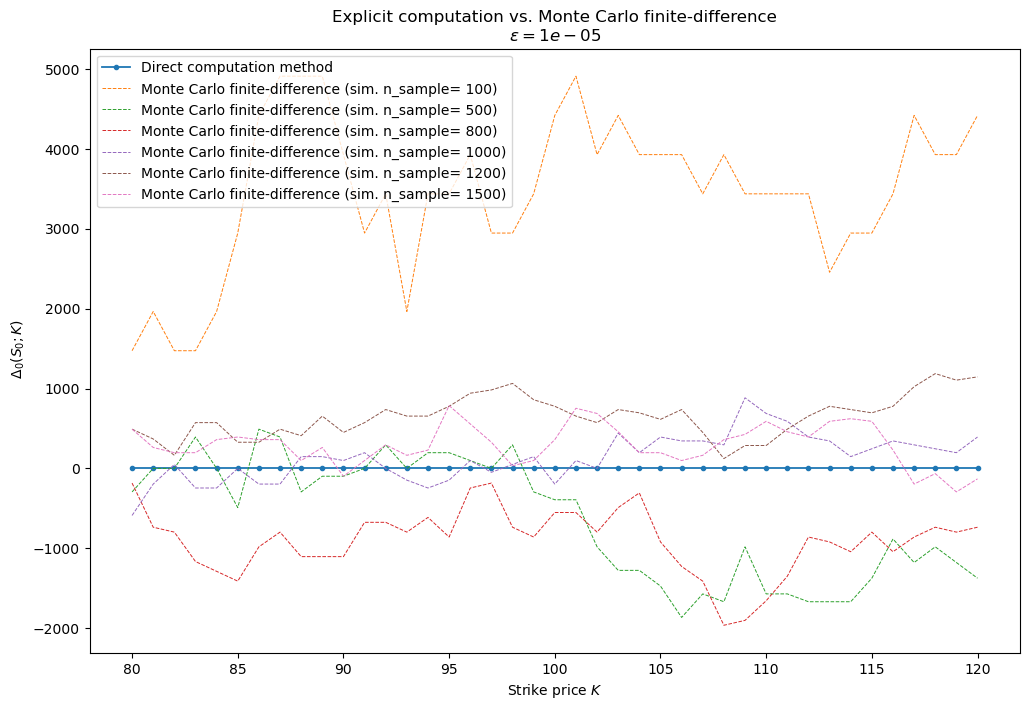

In [80]:
for eps in eps_range:
    plot_delt0_comparison(eps)

>- **Comments:**
The variance seems to be very high for the finite difference method with Monte Carlo, and moreover, the results get worse and worse as ϵ is decreased.

### 3. By writing the price C0 as an integral with respect to the distribution of ST , we obtain the following representation:
$\Delta_0 = e^{−rT}\mathbb{E}[1_{S_T\leq K} \frac{B_T}{S_0\sigma T}]$

#### (a) Build a program which returns a Monte Carlo approximation $\hat{∆}^M_0$ of $∆_0$ based on the last representation.
> A Monte Carlo estimator for Δ is given by:

> $\hat{∆}^ M_0 = \frac{e^{−rT}}{N} \sum_{i=0}^{M} 1_{S_T^{(i)}\leq K} \frac{B_T^{(i)}}{S_0\sigma T}$ 

In [42]:
def Monte_Carlo_delta_Method2(r, sigma, S0, T, K, M):

    """
    Compute the sensibility Delta using the new representation.
    """
    BT = np.sqrt(T)*np.random.randn(M)
    ST = S0*np.exp((r-0.5*sigma**2)*T + sigma*BT)
    payoff = (ST <= K)
    payoff = payoff.T*BT[:, None]/(S0*sigma*T)

    delta= np.exp(-r*T)*np.mean(payoff, axis=0)
    return delta

In [44]:
MC_delta0_Method2 = np.stack([
    Monte_Carlo_delta_Method2(r, sigma0, S0, T, K_range.reshape(-1,1), M) for M in M_range
])

#### (b) Using the parameters values of Question 1c, compare the perfor mances of the approximation $∆^M_0$ and $\hat{∆}^ M_0$ .

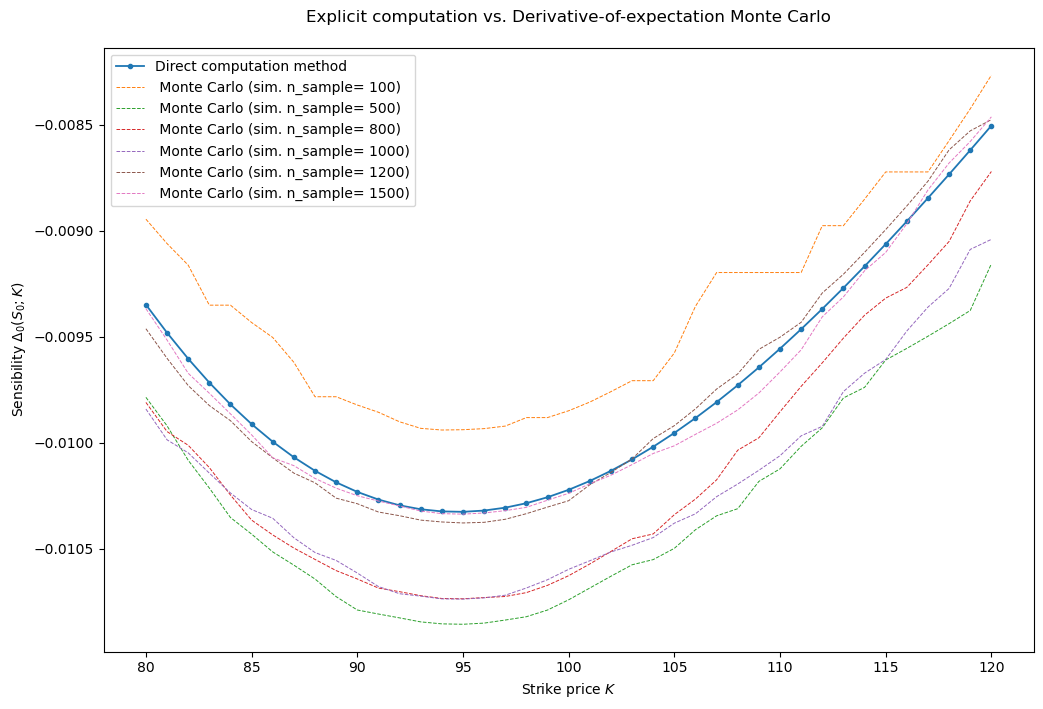

In [82]:
fig, ax0 = plt.subplots(1,1, figsize=(12,8), dpi=100)

math_formula_C0, math_formula_delta0 = optimal_hedging_strategy(r, sigma0, S0, T, K_range)
    
ax0.plot(K_range, math_formula_delta0, zorder=1,
        linewidth=1.3, marker='.', label="Direct computation method")

for i, mc_delta0 in enumerate(MC_delta0_Method2[:]):
    ax0.plot(K_range,mc_delta0,
            linestyle='--',
            linewidth=.7, label=" Monte Carlo (sim. n_sample= %d)" % M_range[i])
ax0.set_xlabel("Strike price $K$")
ax0.set_ylabel("Sensibility $\Delta_0(S_0; K)$")
ax0.set_title("Explicit computation vs. Derivative-of-expectation Monte Carlo\n")
ax0.legend()

>The Monte Carlo estimator $\hat{∆}^ M_0$ of the second representation of $Δ_0$ performs much better than the finite difference method. The variance is of course less than what found with $∆^ M_0$ (When look at the y-axis of both methods)

>We can also notice that this estimator reproduce the convexity of $Δ_0$ with respect to the strike and show clearly the existence of a minimum.